# Load Data

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
crime = pd.read_csv("C:/Users/brimm/OneDrive/Desktop/Data for Python Course/Crime_Data_from_2020_to_Present.csv")

# Cleaning and Understanding the Data

In [13]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [15]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [21]:
crime.shape #27 columns, 852950 records

(852950, 27)

In [23]:
crime.dtypes #change date objects to datetime, for calculations

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [27]:
#Check Nulls
crime.isna().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [29]:
#Get rid of nulls for proper calculations
df = crime.drop(labels = ['modus_operandi','cross_street','weapon_code','weapon_description',
                          'crime_code_2','crime_code_3','crime_code_4'], axis = 1)

In [37]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,M,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,M,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,M,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,F,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,NaN,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,NaN,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973


In [39]:
df.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
status                  object
status_description      object
crime_code_1           float64
location                object
latitude               float64
longitude              float64
dtype: object

In [70]:
df['date_reported'] = pd.to_datetime(df['date_reported'], format ='%Y-%m-%d')


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  object        
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

In [72]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'], format = 'mixed')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  datetime64[ns]
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

In [84]:
df.describe(include=['float64', 'int64']) #shows numerics

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [88]:
df['victim_age'].value_counts()

victim_age
 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [92]:
df_age = df[df['victim_age'] > 0] #Filting out ages less than 0

In [218]:
df_age['victim_age'].value_counts().reset_index()

,victim_age,count
0,30,19421
1,35,19008
2,31,18603
3,29,18552
4,28,18266
...,...,...
94,95,89
95,96,88
96,98,67
97,97,63


In [124]:
df['year'] = df['date_occurred'].dt.year  #Cleaning up data more, by adding date columns for better calculations

df['month'] = df['date_occurred'].dt.month

In [141]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,month,year
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,...,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525,1,2020
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,...,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684,1,2020
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,...,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796,1,2020
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,...,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652,1,2020
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,...,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,...,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439,12,2023
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,...,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477,12,2023
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017,3,2023
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,...,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973,12,2023


# Understanding the Data

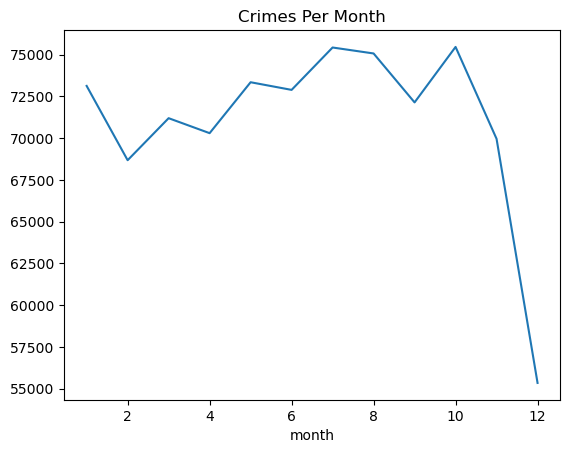

In [139]:
df['month'].value_counts().sort_index().plot() #Crimes based on the Month
plt.title('Crimes Per Month')
plt.show()
#Signficant drop in December due to lack of data in 2023

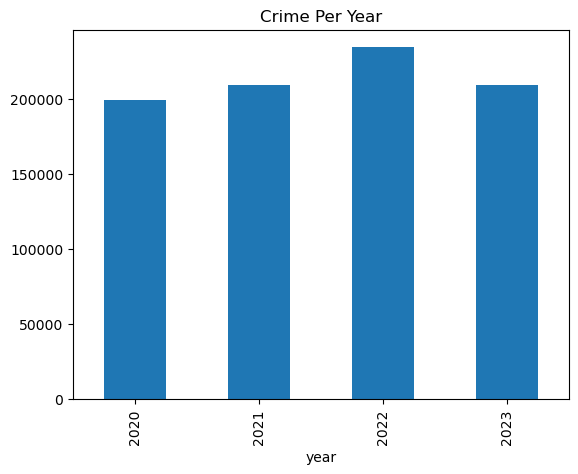

In [145]:
df['year'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Crime Per Year')
plt.show()

In [149]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]  #Excluding Decemeber in 2023 for accurate calculations

In [153]:
df.sort_values(by = 'date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,month,year
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,1,2020
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,1,2020
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,1,2020
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,1,2020
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,11,2023
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,11,2023
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,11,2023
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,11,2023


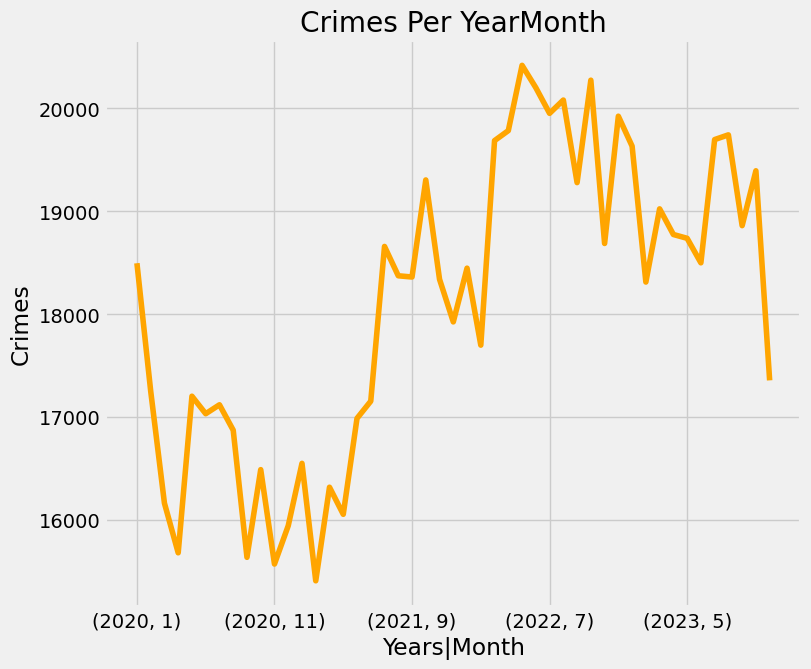

In [191]:
plt.style.available
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,7))
df.groupby(['year','month']).size().plot(color = 'orange')
plt.title('Crimes Per YearMonth')
plt.ylabel('Crimes')
plt.xlabel('Years|Month')
plt.show()



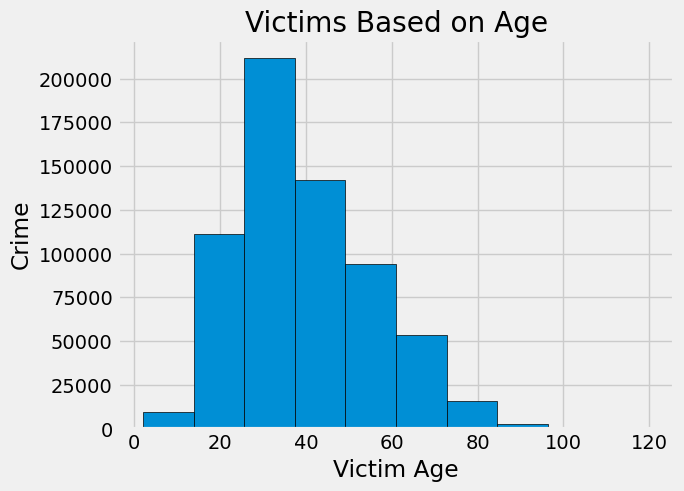

In [195]:
plt.hist(df_age['victim_age'], edgecolor = 'black')
plt.title('Victims Based on Age')
plt.xlabel('Victim Age')
plt.ylabel('Crime')

plt.show()

## What are the  most common crimes that occur?

In [200]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,month,year
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2,2020
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1,2020
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,3,2023
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,4,2023
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,7,2023
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,3,2023


In [ ]:
#Creating new column that doesn't have the time, because it would give up the same day multiple times in our calculations

In [206]:
df['date_occurred_no_time'] = df['date_occurred'].dt.date 

C:\Users\brimm\AppData\Local\Temp\ipykernel_16204\2178151606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_occurred_no_time'] = df['date_occurred'].dt.date


In [208]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_description,status,status_description,crime_code_1,location,latitude,longitude,month,year,date_occurred_no_time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,2020-01-08
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2,2020,2020-02-13
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1,2020,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1,2020,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,3,2023,2023-03-22
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,4,2023,2023-04-12
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,7,2023,2023-07-01
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,3,2023,2023-03-05


In [212]:
crime_count_per_day = df.groupby(['date_occurred_no_time', 'crime_description' ]).size() 

In [230]:
top_20_crimes = crime_count_per_day.groupby(['crime_description']).mean()\
.reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [238]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'average_daily_count', ascending = True)

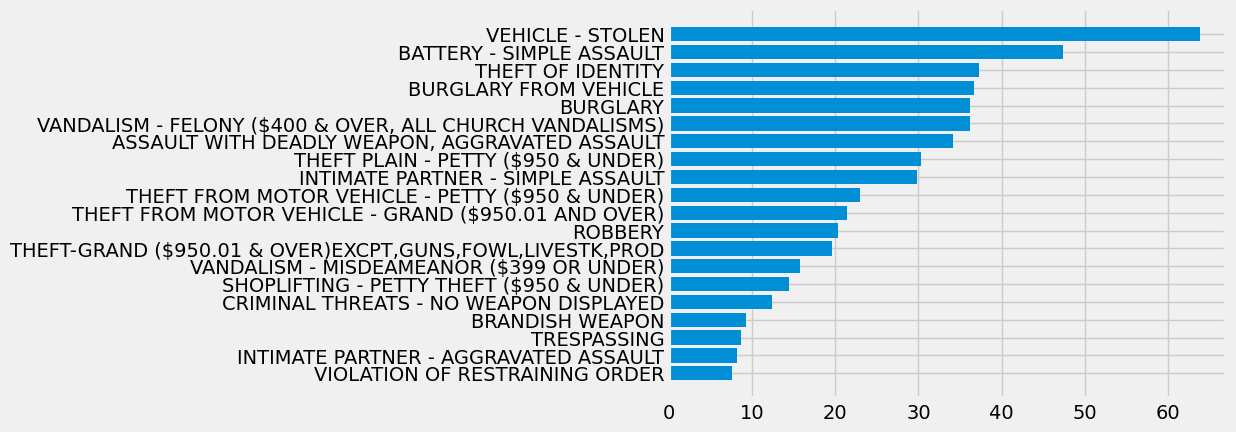

In [242]:
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'])
plt.show()

In [282]:
plt.style.available
plt.style.use('ggplot')

C:\Users\brimm\AppData\Local\Temp\ipykernel_16204\1176681421.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


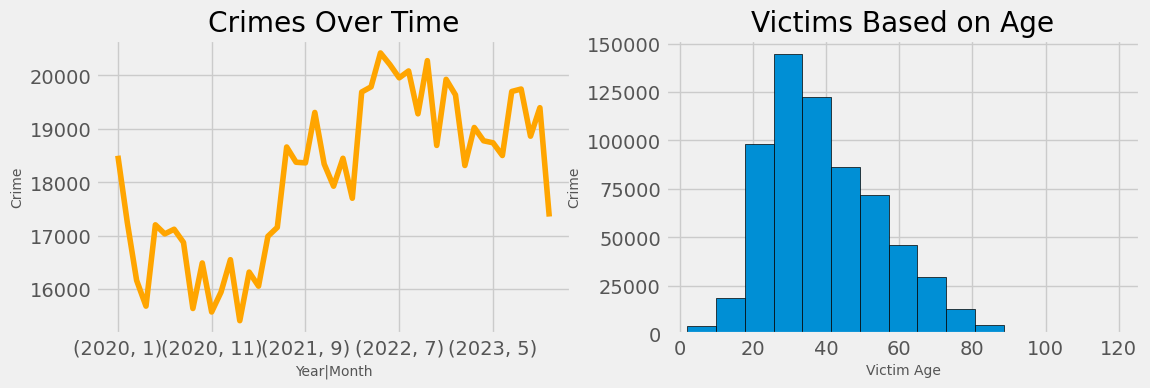

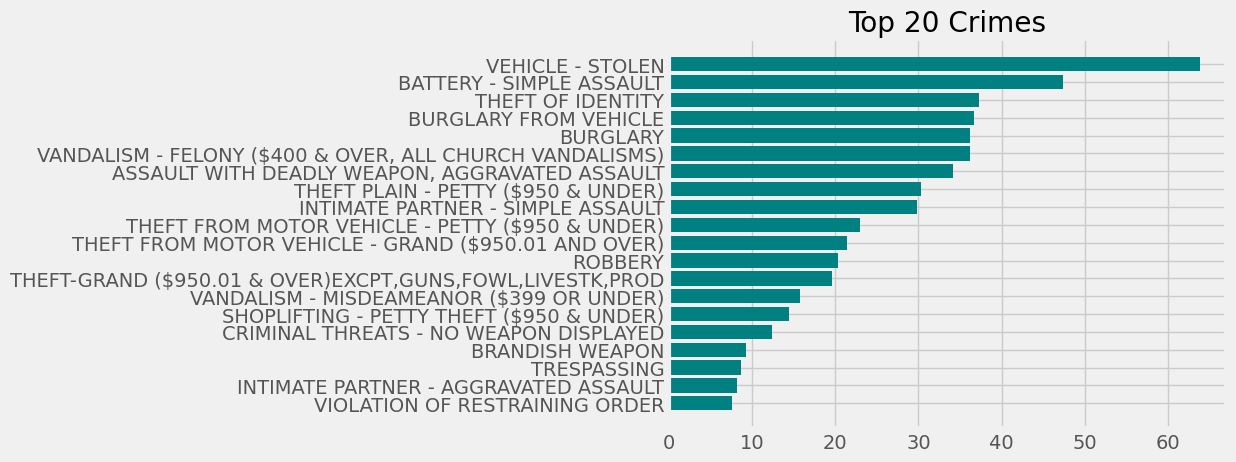

In [304]:
plt.style.available
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,8))

#Plot 1 Line Chart
plt.subplot(2,2,1)
df.groupby(['year','month']).size().plot(color = 'orange')
plt.title('Crimes Over Time')
plt.ylabel('Crime', fontsize = 10)
plt.xlabel('Year|Month', fontsize = 10)

# Plot 3 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)
plt.title('Victims Based on Age')
plt.xlabel('Victim Age', fontsize = 10)
plt.ylabel('Crime', fontsize = 10)
#Plot 2 = Bar Chart

plt.figure()
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'], color = 'teal')
plt.title('Top 20 Crimes')
plt.tight_layout()

## Difference in crime reported and time occured - How long it takes to report?


In [307]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_description,status,status_description,crime_code_1,location,latitude,longitude,month,year,date_occurred_no_time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,2020-01-08
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2,2020,2020-02-13
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1,2020,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1,2020,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,3,2023,2023-03-22
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,4,2023,2023-04-12
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,7,2023,2023-07-01
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,3,2023,2023-03-05


In [327]:
df['Time to report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days


C:\Users\brimm\AppData\Local\Temp\ipykernel_16204\2468609952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time to report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days


In [329]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,month,year,date_occurred_no_time,Time to report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,1,2020,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,1,2020,2020-01-01,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2,2020,2020-02-13,61
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,1,2020,2020-01-01,0
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,1,2020,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,3,2023,2023-03-22,0
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,4,2023,2023-04-12,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,7,2023,2023-07-01,1
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,3,2023,2023-03-05,0


In [319]:
df['Time to report'].value_counts().head(10)

Time to report
0 days    419620
1 days    185029
2 days     52808
3 days     30894
4 days     19932
5 days     14416
6 days     10837
7 days      9722
8 days      7053
9 days      5660
Name: count, dtype: int64

In [341]:
# Calculates the time it takes to report a crime based on the crime description

In [339]:
df.groupby(['crime_description'])['Time to report'].mean().sort_values(ascending = False).head(10).reset_index()

,crime_description,Time to report
0,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,128.181013
1,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,123.779056
2,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",110.913921
3,LEWD/LASCIVIOUS ACTS WITH CHILD,97.324675
4,DISHONEST EMPLOYEE ATTEMPTED THEFT,87.000000
5,BIGAMY,77.666667
6,SEXUAL PENETRATION W/FOREIGN OBJECT,66.092946
7,ORAL COPULATION,62.078616
8,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",61.322581
9,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",59.657109


In [343]:
#Identify the top 3 crimes with the highest average victim age

In [359]:
df_age.groupby('crime_description')['victim_age'].mean().reset_index().sort_values(by = 'victim_age', ascending = False).head(3)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000


In [371]:
#Find the area with the highest number of crimes occuring during nighttime
nighttime_crimes = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour <= 3)]

In [373]:
nighttime_crimes['area_name'].value_counts()

area_name
Central        18873
77th Street    17568
Hollywood      15741
Pacific        15328
Southwest      14819
Southeast      14638
Olympic        14256
Newton         13843
N Hollywood    13428
Rampart        13047
Wilshire       11665
Harbor         11623
Northeast      11379
West Valley    11351
West LA        11012
Van Nuys       10964
Mission        10813
Hollenbeck     10425
Devonshire     10172
Topanga        10104
Foothill        8745
Name: count, dtype: int64

In [381]:
hourly_crime = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

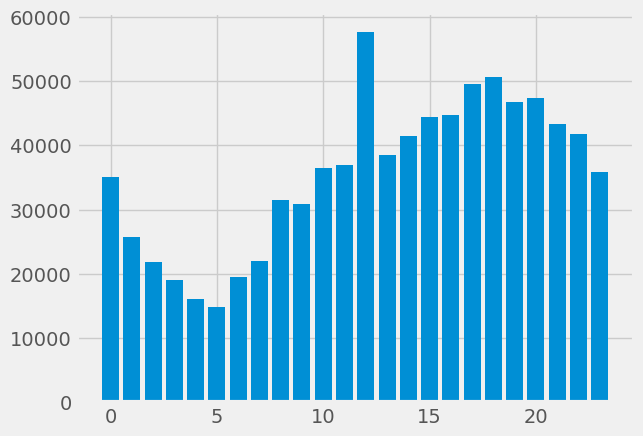

In [385]:
plt.bar(hourly_crime['date_occurred'], hourly_crime['count'])

In [405]:
df[df['date_occurred'].dt.hour == 12]['crime_description'].value_counts().reset_index()

,crime_description,count
0,THEFT OF IDENTITY,9098
1,VEHICLE - STOLEN,4048
2,BATTERY - SIMPLE ASSAULT,3958
3,THEFT PLAIN - PETTY ($950 & UNDER),3785
4,BURGLARY,2945
...,...,...
119,"DRUGS, TO A MINOR",1
120,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",1
121,BIGAMY,1
122,GRAND THEFT / INSURANCE FRAUD,1


In [431]:
no_identity_theft = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]

In [433]:
new_hourly_count = no_identity_theft = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

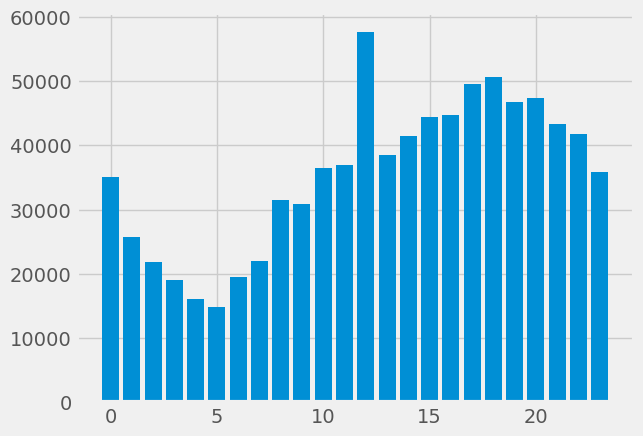

In [435]:
plt.bar(new_hourly_count['date_occurred'], new_hourly_count['count'])
